# <CENTER>ANALISIS DE LA SEÑAL SISMICA DE UN LAHAR: 12 DE OCTUBRE DE 2011, LAHAR EN EL VOLCÁN DE COLIMA, MÉXICO
<p style="text-align:justify"><I> Guillermo Alberto Sapiéns Peiro|Facultad de Ciencias de la Tierra y el Espacio |Universidad Autónoma de Sinaloa|galberto.sapiens@gmail.com. Asesor Dr. Victor Hugo Márquez|Centro de Goeciencias|Universidad Nacional Autónoma de México.<p>

#### PLANTEAMIENTO DEL PROBLEMA
<p style="text-align:justify">El volcán de colima es uno de los volcanes más activos en México en el cual los lahares son muy comunes. Los lahares son considerados uno de los fenómenos más peligrosos entre los procesos volcánicos, son mezclas de detritos rocosos movilizados por agua, que fluyen rápidamente y se originan en las laderas de los volcanes.
El monitoreo sísmico o acústico en los volcanes se utiliza como la base para los sistemas de alerta de lahares, por eso el análisis de los datos obtenidos en las estaciones es de importancia para entender los procesos del fenómeno. En octubre de 2011 el Huracan Jova afectó los estados de Colima, Jalisco y Nayarit dejando fuertes lluvias durante su paso, las cuales son una fuente importante en el proceso de formación de lahares en el volcán de Fuego de colima. El fenómeno suscitado el 12 de octubre de 2011 durante el paso de jova fue registrado por sensores de monitoreo situados en el volcán, de los cuales se obtuvieron datos para su respectivo análisis.</p>


In [3]:
using Plots;

In [4]:
datE=readdlm("JovaE-O.dat")
datN=readdlm("JovaN-S.dat")
datZ=readdlm("JovaZ.dat");

In [5]:
δ=100
t1= DateTime(2011,10,12,6,0,0)
tE=collect(0:1:length(datE)-1)*(1/δ)
t=collect(t1:Dates.Millisecond(10):t1+(length(datE)-1)*(Dates.Millisecond(10)));

INFO: Recompiling stale cache file /home/taller/.julia/lib/v0.5/LaTeXStrings.ji for module LaTeXStrings.
INFO: Recompiling stale cache file /home/taller/.julia/lib/v0.5/PyPlot.ji for module PyPlot.



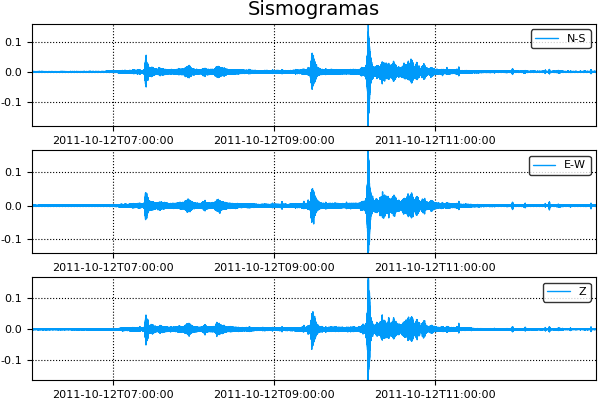

In [7]:
NS=Plots.plot(t,datN,label="N-S", title="Sismogramas")
EW=Plots.plot(t,datE,label="E-W")
Z=Plots.plot(t,datZ,label="Z");
Plots.plot(NS,EW,Z, layout=(3,1))

APlicando las transformadas de fourier

In [9]:
FN=fft(datN)
FE=fft(datE)
FZ=fft(datZ)
tF=collect(0:1:((length(FN)-1)/2)-1)*((δ)/((length(FN))));


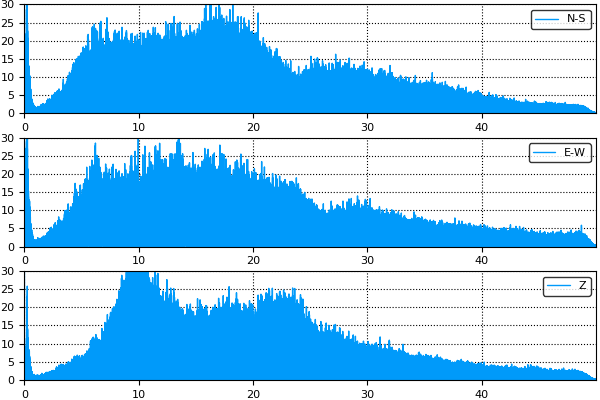

In [16]:
FN1=Plots.plot(tF,abs.(FN[1:Int((length(FN)/2))]),ylim=(0,30),label="N-S")
FE1=Plots.plot(tF,abs.(FE[1:Int((length(FE)/2))]),ylim=(0,30),label="E-W")
FZ1=Plots.plot(tF,abs.(FZ[1:Int((length(FZ)/2))]),ylim=(0,30),label="Z")
Plots.plot(FN1,FE1,FZ1,layout=(3,1))

In [21]:
using DSP
using PyPlot

In [28]:
spN=PyPlot.specgram(datN,NFFT=256,Fs=100,noverlap=50)

LoadError: PyError (:PyObject_Call) <type 'exceptions.ValueError'>
ValueError(u'only 1-dimensional arrays can be used',)
  File "/home/taller/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/pyplot.py", line 3504, in specgram
    vmin=vmin, vmax=vmax, data=data, **kwargs)
  File "/home/taller/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/__init__.py", line 1898, in inner
    return func(ax, *args, **kwargs)
  File "/home/taller/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 7229, in specgram
    mode=mode)
  File "/home/taller/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/mlab.py", line 1287, in specgram
    mode=mode)
  File "/home/taller/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/mlab.py", line 715, in _spectral_helper
    result = stride_windows(x, NFFT, noverlap, axis=0)
  File "/home/taller/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/mlab.py", line 547, in stride_windows
    raise ValueError('only 1-dimensional arrays can be used')


In [39]:
spec=DSP.Periodograms.spectrogram(datN,nfft=256,fs=100)


LoadError: MethodError: no method matching spectrogram(::Array{Float64,2}; nfft=256, fs=100)[0m
Closest candidates are:
  spectrogram{T}([1m[31m::AbstractArray{T,1}[0m) at /home/taller/.julia/v0.5/DSP/src/periodograms.jl:356[1m[31m got unsupported keyword arguments "nfft", "fs"[0m
  spectrogram{T}([1m[31m::AbstractArray{T,1}[0m, [1m[31m::Int64[0m) at /home/taller/.julia/v0.5/DSP/src/periodograms.jl:356[1m[31m got unsupported keyword arguments "nfft", "fs"[0m
  spectrogram{T}([1m[31m::AbstractArray{T,1}[0m, [1m[31m::Int64[0m, [1m[31m::Int64[0m; fs, onesided, nfft, window) at /home/taller/.julia/v0.5/DSP/src/periodograms.jl:356[0m

In [37]:
PyPlot.specgram(datE,nfft=256,fs=100)

LoadError: PyError (:PyObject_Call) <type 'exceptions.ValueError'>
ValueError(u'only 1-dimensional arrays can be used',)
  File "/home/taller/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/pyplot.py", line 3504, in specgram
    vmin=vmin, vmax=vmax, data=data, **kwargs)
  File "/home/taller/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/__init__.py", line 1898, in inner
    return func(ax, *args, **kwargs)
  File "/home/taller/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 7229, in specgram
    mode=mode)
  File "/home/taller/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/mlab.py", line 1287, in specgram
    mode=mode)
  File "/home/taller/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/mlab.py", line 715, in _spectral_helper
    result = stride_windows(x, NFFT, noverlap, axis=0)
  File "/home/taller/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/mlab.py", line 547, in stride_windows
    raise ValueError('only 1-dimensional arrays can be used')


In [33]:
DSP.Periodograms.spectrogram(datN,NFFT=256,Fs=100,noverlap=50)

LoadError: MethodError: no method matching spectrogram(::Array{Float64,2}; NFFT=256, Fs=100, noverlap=50)[0m
Closest candidates are:
  spectrogram{T}([1m[31m::AbstractArray{T,1}[0m) at /home/taller/.julia/v0.5/DSP/src/periodograms.jl:356[1m[31m got unsupported keyword arguments "NFFT", "Fs", "noverlap"[0m
  spectrogram{T}([1m[31m::AbstractArray{T,1}[0m, [1m[31m::Int64[0m) at /home/taller/.julia/v0.5/DSP/src/periodograms.jl:356[1m[31m got unsupported keyword arguments "NFFT", "Fs", "noverlap"[0m
  spectrogram{T}([1m[31m::AbstractArray{T,1}[0m, [1m[31m::Int64[0m, [1m[31m::Int64[0m; fs, onesided, nfft, window) at /home/taller/.julia/v0.5/DSP/src/periodograms.jl:356[1m[31m got unsupported keyword arguments "NFFT", "Fs", "noverlap"[0m[0m